In [7]:

# View information about the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
asin              1689188 non-null object
helpful           1689188 non-null object
overall           1689188 non-null int64
reviewText        1689188 non-null object
reviewTime        1689188 non-null object
reviewerID        1689188 non-null object
reviewerName      1664458 non-null object
summary           1689188 non-null object
unixReviewTime    1689188 non-null int64
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [6]:
raw_df.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400


In [1]:
from __future__ import absolute_import, division, print_function
import pandas as pd
# load the data into panda dataframe
data_file_name = "D:\DEAN\DATA\Electronics_5.json"
raw_df = pd.read_json(data_file_name, lines=True)
print("Data loaded")

Data loaded


In [9]:
# Convert all the review text into a long string and print its length
raw_corpus = u''.join(raw_df['reviewText']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

Raw Corpus contains 1,072,975,152 characters


In [12]:
# import natural language toolkit
import nltk
# download the punkt tokenizer
nltk.download('punkt')
print("The punkt tokenizer is downloaded")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sundargan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
The punkt tokenizer is downloaded


In [13]:
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

In [15]:
dir(tokenizer)

['PUNCTUATION',
 '_Token',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_annotate_first_pass',
 '_annotate_second_pass',
 '_annotate_tokens',
 '_build_sentence_list',
 '_first_pass_annotation',
 '_lang_vars',
 '_ortho_heuristic',
 '_params',
 '_realign_boundaries',
 '_second_pass_annotation',
 '_slices_from_text',
 '_tokenize_words',
 'debug_decisions',
 'dump',
 'sentences_from_text',
 'sentences_from_text_legacy',
 'sentences_from_tokens',
 'span_tokenize',
 'span_tokenize_sents',
 'text_contains_sentbreak',
 'tokenize',
 'tokenize_sents',
 'train']

In [17]:
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")
# we tokenize the raw string into raw sentences
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

The punkt tokenizer is loaded
We have 10,294,331 raw sentences


In [25]:
raw=raw_sentences[1]

In [47]:
from collections import Counter
couter = Counter(raw)
array = [[k,v] for k,v in couter.iteritems()]

In [49]:
df = pd.DataFrame(array)

In [68]:
df[0]

0       Impressed
1            just
2          within
3              it
4          glitch
5              in
6     expected...
7             use
8            Very
9            been
10          time,
11            few
12           week
13           that
14        started
15        earlier
16       freezing
17        however
18        arrived
19           with
20           than
21              a
22          unit.
23             of
24          could
25           days
26       shipping
27            the
28          up...
Name: 0, dtype: object

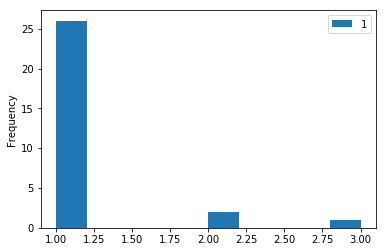

In [74]:
%matplotlib inline
import matplotlib
df.plot.hist(by=df[1])

In [11]:
import re
# Clean and split sentence into words
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()

In [12]:
# clean each raw sentences and build the list of sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))
print("We have {0:,} clean sentences".format(len(sentences)))

We have 10,294,331 clean sentences


In [13]:
print(raw_sentences[32])
print()
print(sentences[32])

What I would do is using a map I would route myself several different ways forcing the unit by putting in stops or vias at different locations along the route, otherwise, like most GPS 's, it determines what it thinks is the best route.

[u'What', u'I', u'would', u'do', u'is', u'using', u'a', u'map', u'I', u'would', u'route', u'myself', u'several', u'different', u'ways', u'forcing', u'the', u'unit', u'by', u'putting', u'in', u'stops', u'or', u'vias', u'at', u'different', u'locations', u'along', u'the', u'route', u'otherwise', u'like', u'most', u'GPS', u's', u'it', u'determines', u'what', u'it', u'thinks', u'is', u'the', u'best', u'route']


In [14]:
token_count = sum([len(sentence) for sentence in sentences])
print("The dataset corpus contains {0:,} tokens".format(token_count))

The dataset corpus contains 200,736,571 tokens


In [15]:
import multiprocessing

#Dimensionality of the resulting word vectors
num_features = 300

#Minimum word count threshold
min_word_count = 3

#Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()

#Context window length
context_size = 7

#Seed for the RNG, to make the result reproducible
seed = 1

In [16]:
import gensim

word2vec_model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers, 
    size=num_features, 
    min_count=min_word_count, 
    window=context_size)

D:\Road_Rash\python\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [17]:
word2vec_model.build_vocab(sentences=sentences)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(word2vec_model.wv.vocab))

The vocabulary is built
Word2Vec vocabulary length:  145759


In [13]:
word2vec_model.train(sentences=sentences,total_examples=word2vec_model.corpus_count, epochs=word2vec_model.iter)
print("Training finished")


Training finished


In [18]:
word2vec_model.save("word2vec_model_trained_on_electronics_5.w2v")
print("Model saved")

Model saved


In [19]:
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_Health_and_Personal_Care_5.w2v")
print("Model loaded")

Model loaded


In [20]:
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000L, 300L)


In [21]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000L, 2L)


In [22]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [23]:
points.head(10)


,word,x,y
0,Caltrate,-23.869360,29.907610
1,EXPLAIN,-58.154968,-20.138969
2,gah,-14.707789,-29.677118
3,fleeces,34.604122,-14.970541
4,woods,53.996342,5.043073
5,clotted,15.332156,-40.694756
6,spiders,57.965797,6.793596
7,hanging,55.172935,21.322357
8,bromelain,-35.909286,34.884350
9,woody,-15.329952,47.521500


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

In [39]:

points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [40]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [42]:
plot_region (x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))

ValueError: scatter requires x column to be numeric

In [27]:

w2v_model.most_similar("battery")

[(u'batteries', 0.7920588850975037),
 (u'rechargeable', 0.76487135887146),
 (u'AAA', 0.7497361898422241),
 (u'AA', 0.7415204048156738),
 (u'lithium', 0.7414789795875549),
 (u'charge', 0.732300877571106),
 (u'recharging', 0.7225194573402405),
 (u'volt', 0.7218225002288818),
 (u'Battery', 0.7202345132827759),
 (u'charger', 0.7186477184295654)]